In [35]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from ctapipe.io import read_table
from ctapipe.visualization import CameraDisplay
from ctapipe_io_lst import load_camera_geometry
from ctapipe.coordinates import EngineeringCameraFrame
from lstchain.io import get_dataset_keys

from ctapipe_io_lst.constants import (
    N_GAINS, N_PIXELS, N_MODULES, N_SAMPLES, LOW_GAIN, HIGH_GAIN,
    N_PIXELS_MODULE, N_CAPACITORS_PIXEL, N_CAPACITORS_CHANNEL
)


In [36]:
# change the name with you path
#file_name="/fefs/aswg/data/real/monitoring/PixelCalibration/LevelA/drs4_baseline/20210915/pro/drs4_pedestal.Run06307.0000.h5"
file_name="/Users/cassol/Documents/soft/2022_01_lstchain_school/data/real/monitoring/PixelCalibration/LevelA/drs4_baseline/20210915/pro/drs4_pedestal.Run06307.0000.h5"

tel_id=1 

# find the keys' namehttp://127.0.0.1:8888/notebooks/calibration/read_pedestal_files_exercise_solutions.ipynb#
dataset_keys=get_dataset_keys(file_name)
print(f"file keys: {dataset_keys}")

# read the table
table = read_table(file_name, dataset_keys[0])


file keys: ['/r1/monitoring/drs4_baseline/tel_001']


In [37]:
# look at the table
table

"baseline_mean [2,1855,4096]","baseline_std [2,1855,4096]","baseline_counts [2,1855,4096]","spike_height [2,1855,3]"
uint16,uint16,uint16,uint16
400 .. 400,8 .. 3,143 .. 140,49 .. 9


<font size="5">Solution exercise 1: <br>
    
<font size="4"> Plot the counts as function of the capacitors for pixel 0 for the two gain channels<br>

In [38]:
# consider the counts table
counts_data = table[0]['baseline_counts']
print(counts_data.shape)


(2, 1855, 4096)


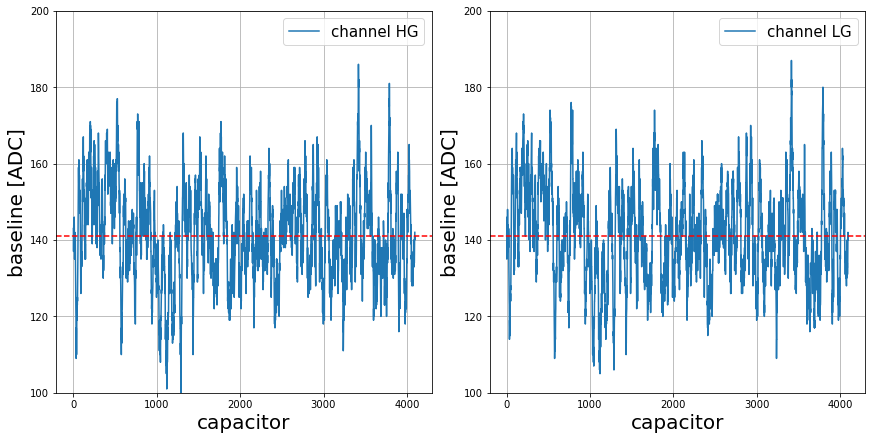

In [16]:
# plot the number of counts used for the baseline estimation for a given pixel
pixel=0
channel=["HG","LG"]

fig, ax = plt.subplots(1, 2, figsize=(12,6),constrained_layout=True)
for chan in np.arange(2):
    label=f"channel {channel[chan]}"
    ax[chan].grid(True)
    ax[chan].plot(counts_data[chan,pixel,:],label=label)
    
    ped_median=np.median(counts_data[chan,pixel,:])    
    ax[chan].axhline(ped_median, color='red',linestyle="--")
    ax[chan].set_ylim(100,200)
    ax[chan].set_ylabel(f'baseline [ADC]',fontsize=20) 
    ax[chan].set_xlabel(f'capacitor',fontsize=20) 
   
    ax[chan].legend(prop={'size':15})


<font size="5">Solution exercise 2: <br>
    
<font size="4"> Plot the height of the 3 types of spikes in a single histogram for each gain channel     

In [17]:
# consider the spike table: there are 3 type of spikes]
spike_data = table[0]['spike_height']
print(spike_data.shape)


(2, 1855, 3)


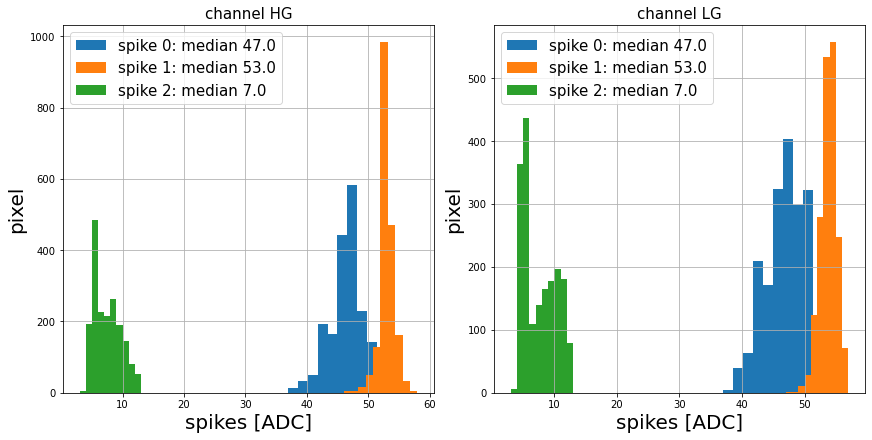

In [39]:
# plot the spikes

channel=["HG","LG"]

fig, ax = plt.subplots(1, 2, figsize=(12,6),constrained_layout=True)
for chan in np.arange(2):
    label=f"channel {channel[chan]}"
    ax[chan].set_title(label, fontsize=15)
    ax[chan].grid(True)
    
    for spike in np.arange(3):
        label=f"spike {spike}: median {np.median(spike_data[chan,:,spike]):3.1f}"
        ax[chan].hist(spike_data[chan,:,spike], label=label)
               
        ax[chan].set_xlabel(f'spikes [ADC]',fontsize=20) 
        ax[chan].set_ylabel(f'pixel',fontsize=20) 

        ax[chan].legend(prop={'size':15})
